In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = pd.read_csv(r"/content/IMDb Movies India.csv", encoding='latin1')
data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
...,...,...,...,...,...,...,...,...,...,...
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
15506,Zulmi Raj,(2005),NaN,Action,NaN,NaN,Kiran Thej,Sangeeta Tiwari,NaN,NaN
15507,Zulmi Shikari,(1988),NaN,Action,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
data = pd.read_csv(r"/content/IMDb Movies India.csv", encoding='latin1')

# Drop rows where Rating or Votes are missing
data.dropna(subset=['Rating', 'Votes'], inplace=True)

# Fill missing values in categorical columns with 'Unknown'
data['Genre'].fillna('Unknown', inplace=True)
data['Director'].fillna('Unknown', inplace=True)
data['Actor 1'].fillna('Unknown', inplace=True)
data['Actor 2'].fillna('Unknown', inplace=True)
data['Actor 3'].fillna('Unknown', inplace=True)

# Convert Votes column to numeric after removing commas
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)

# Encode categorical variables
le_genre = LabelEncoder()
le_director = LabelEncoder()
le_actor1 = LabelEncoder()
le_actor2 = LabelEncoder()
le_actor3 = LabelEncoder()

data['Genre'] = le_genre.fit_transform(data['Genre'])
data['Director'] = le_director.fit_transform(data['Director'])
data['Actor 1'] = le_actor1.fit_transform(data['Actor 1'])
data['Actor 2'] = le_actor2.fit_transform(data['Actor 2'])
data['Actor 3'] = le_actor3.fit_transform(data['Actor 3'])

# Define features (X) and target (y)
X = data[['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Votes']]
y = data['Rating']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict ratings on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")



Mean Squared Error (MSE): 1.75
R-squared (R2): 0.06


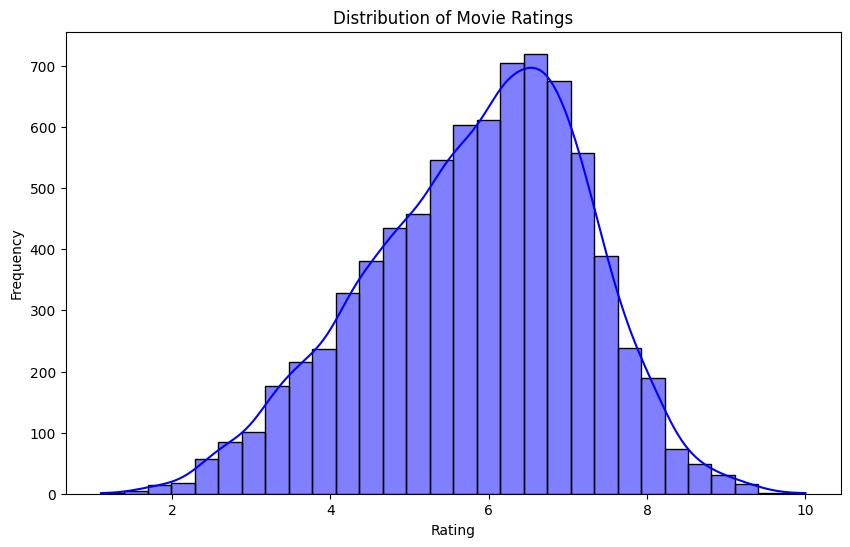

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting distribution of ratings
plt.figure(figsize=(10, 6))
sns.histplot(data['Rating'], bins=30, kde=True, color='blue', edgecolor='black')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()


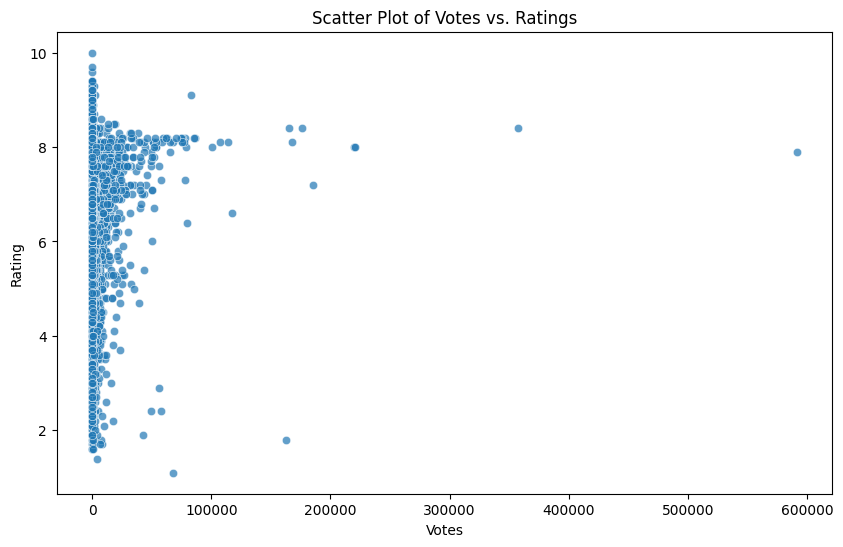

In [ ]:
# Scatter plot of Votes vs. Ratings
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Votes', y='Rating', data=data, alpha=0.7)
plt.title('Scatter Plot of Votes vs. Ratings')
plt.xlabel('Votes')
plt.ylabel('Rating')
plt.show()


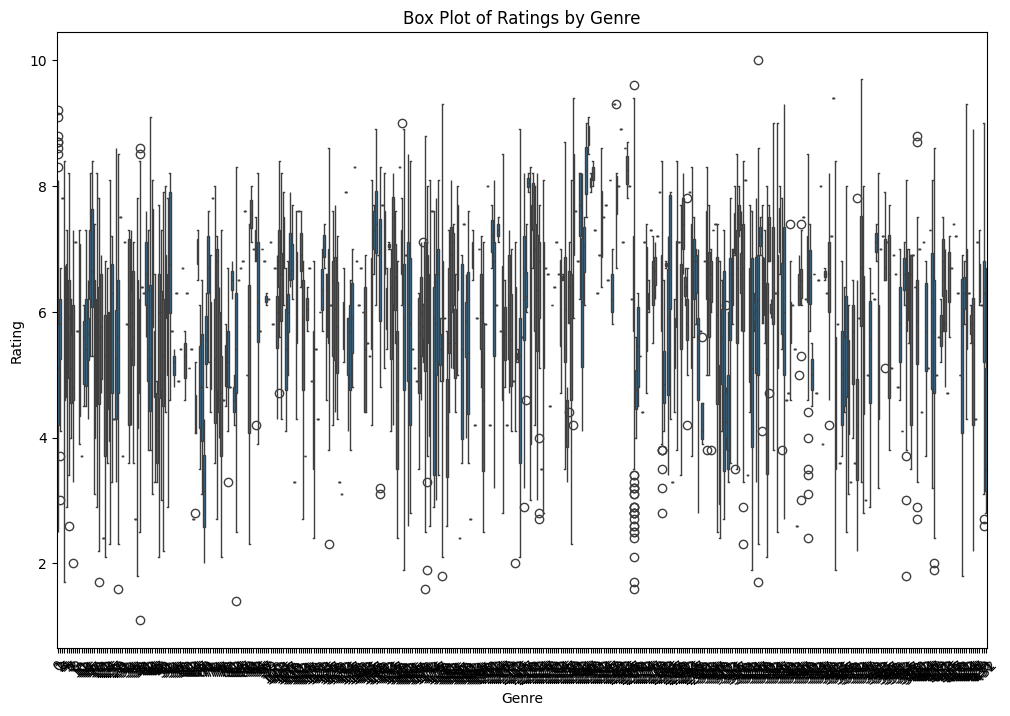

In [ ]:
# Box plot of Ratings by Genre
plt.figure(figsize=(12, 8))
sns.boxplot(x='Genre', y='Rating', data=data)
plt.title('Box Plot of Ratings by Genre')
plt.xlabel('Genre')
plt.ylabel('Rating')
plt.xticks(rotation=45)
plt.show()

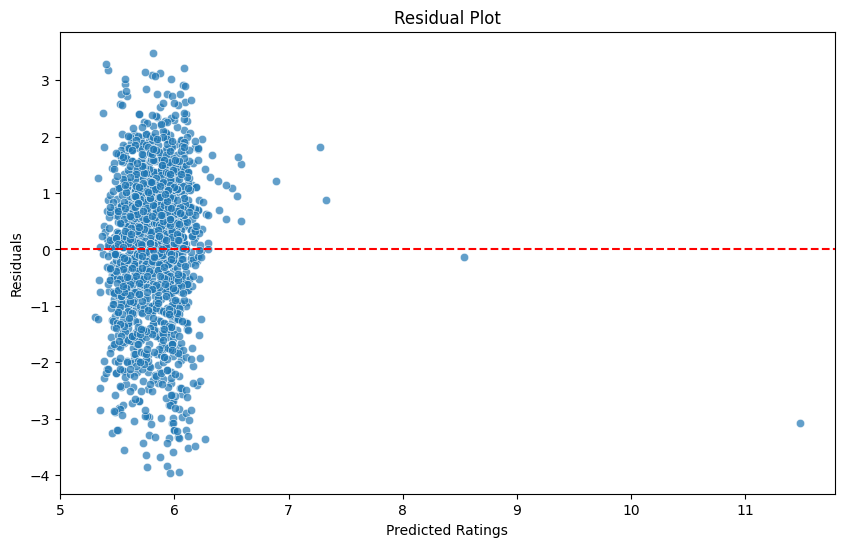

In [ ]:
# Assuming 'y_pred' and 'y_test' are available from your model evaluation
residuals = y_test - y_pred

plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.show()



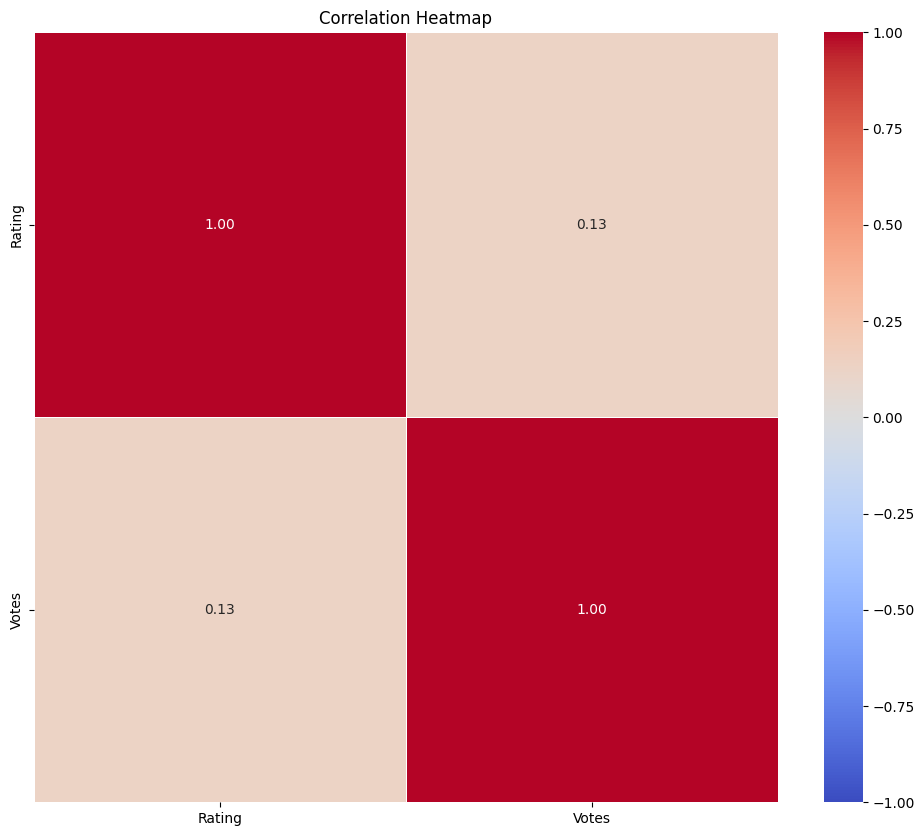

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv(r"/content/IMDb Movies India.csv", encoding='latin1')

# Drop rows with missing values in columns that should be numeric
data.dropna(subset=['Rating', 'Votes'], inplace=True)

# Convert 'Votes' column to numeric after removing commas
data['Votes'] = data['Votes'].str.replace(',', '').astype(float)

# Convert non-numeric columns to numeric where appropriate, or drop them
# Convert categorical data to numerical data if necessary
# Example: Encoding 'Genre' as numeric (if 'Genre' is relevant for correlation)
# data['Genre'] = data['Genre'].astype('category').cat.codes

# Select only numeric columns for correlation analysis
numeric_data = data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numeric_data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap='coolwarm',
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    fmt='.2f'
)
plt.title('Correlation Heatmap')
plt.show()

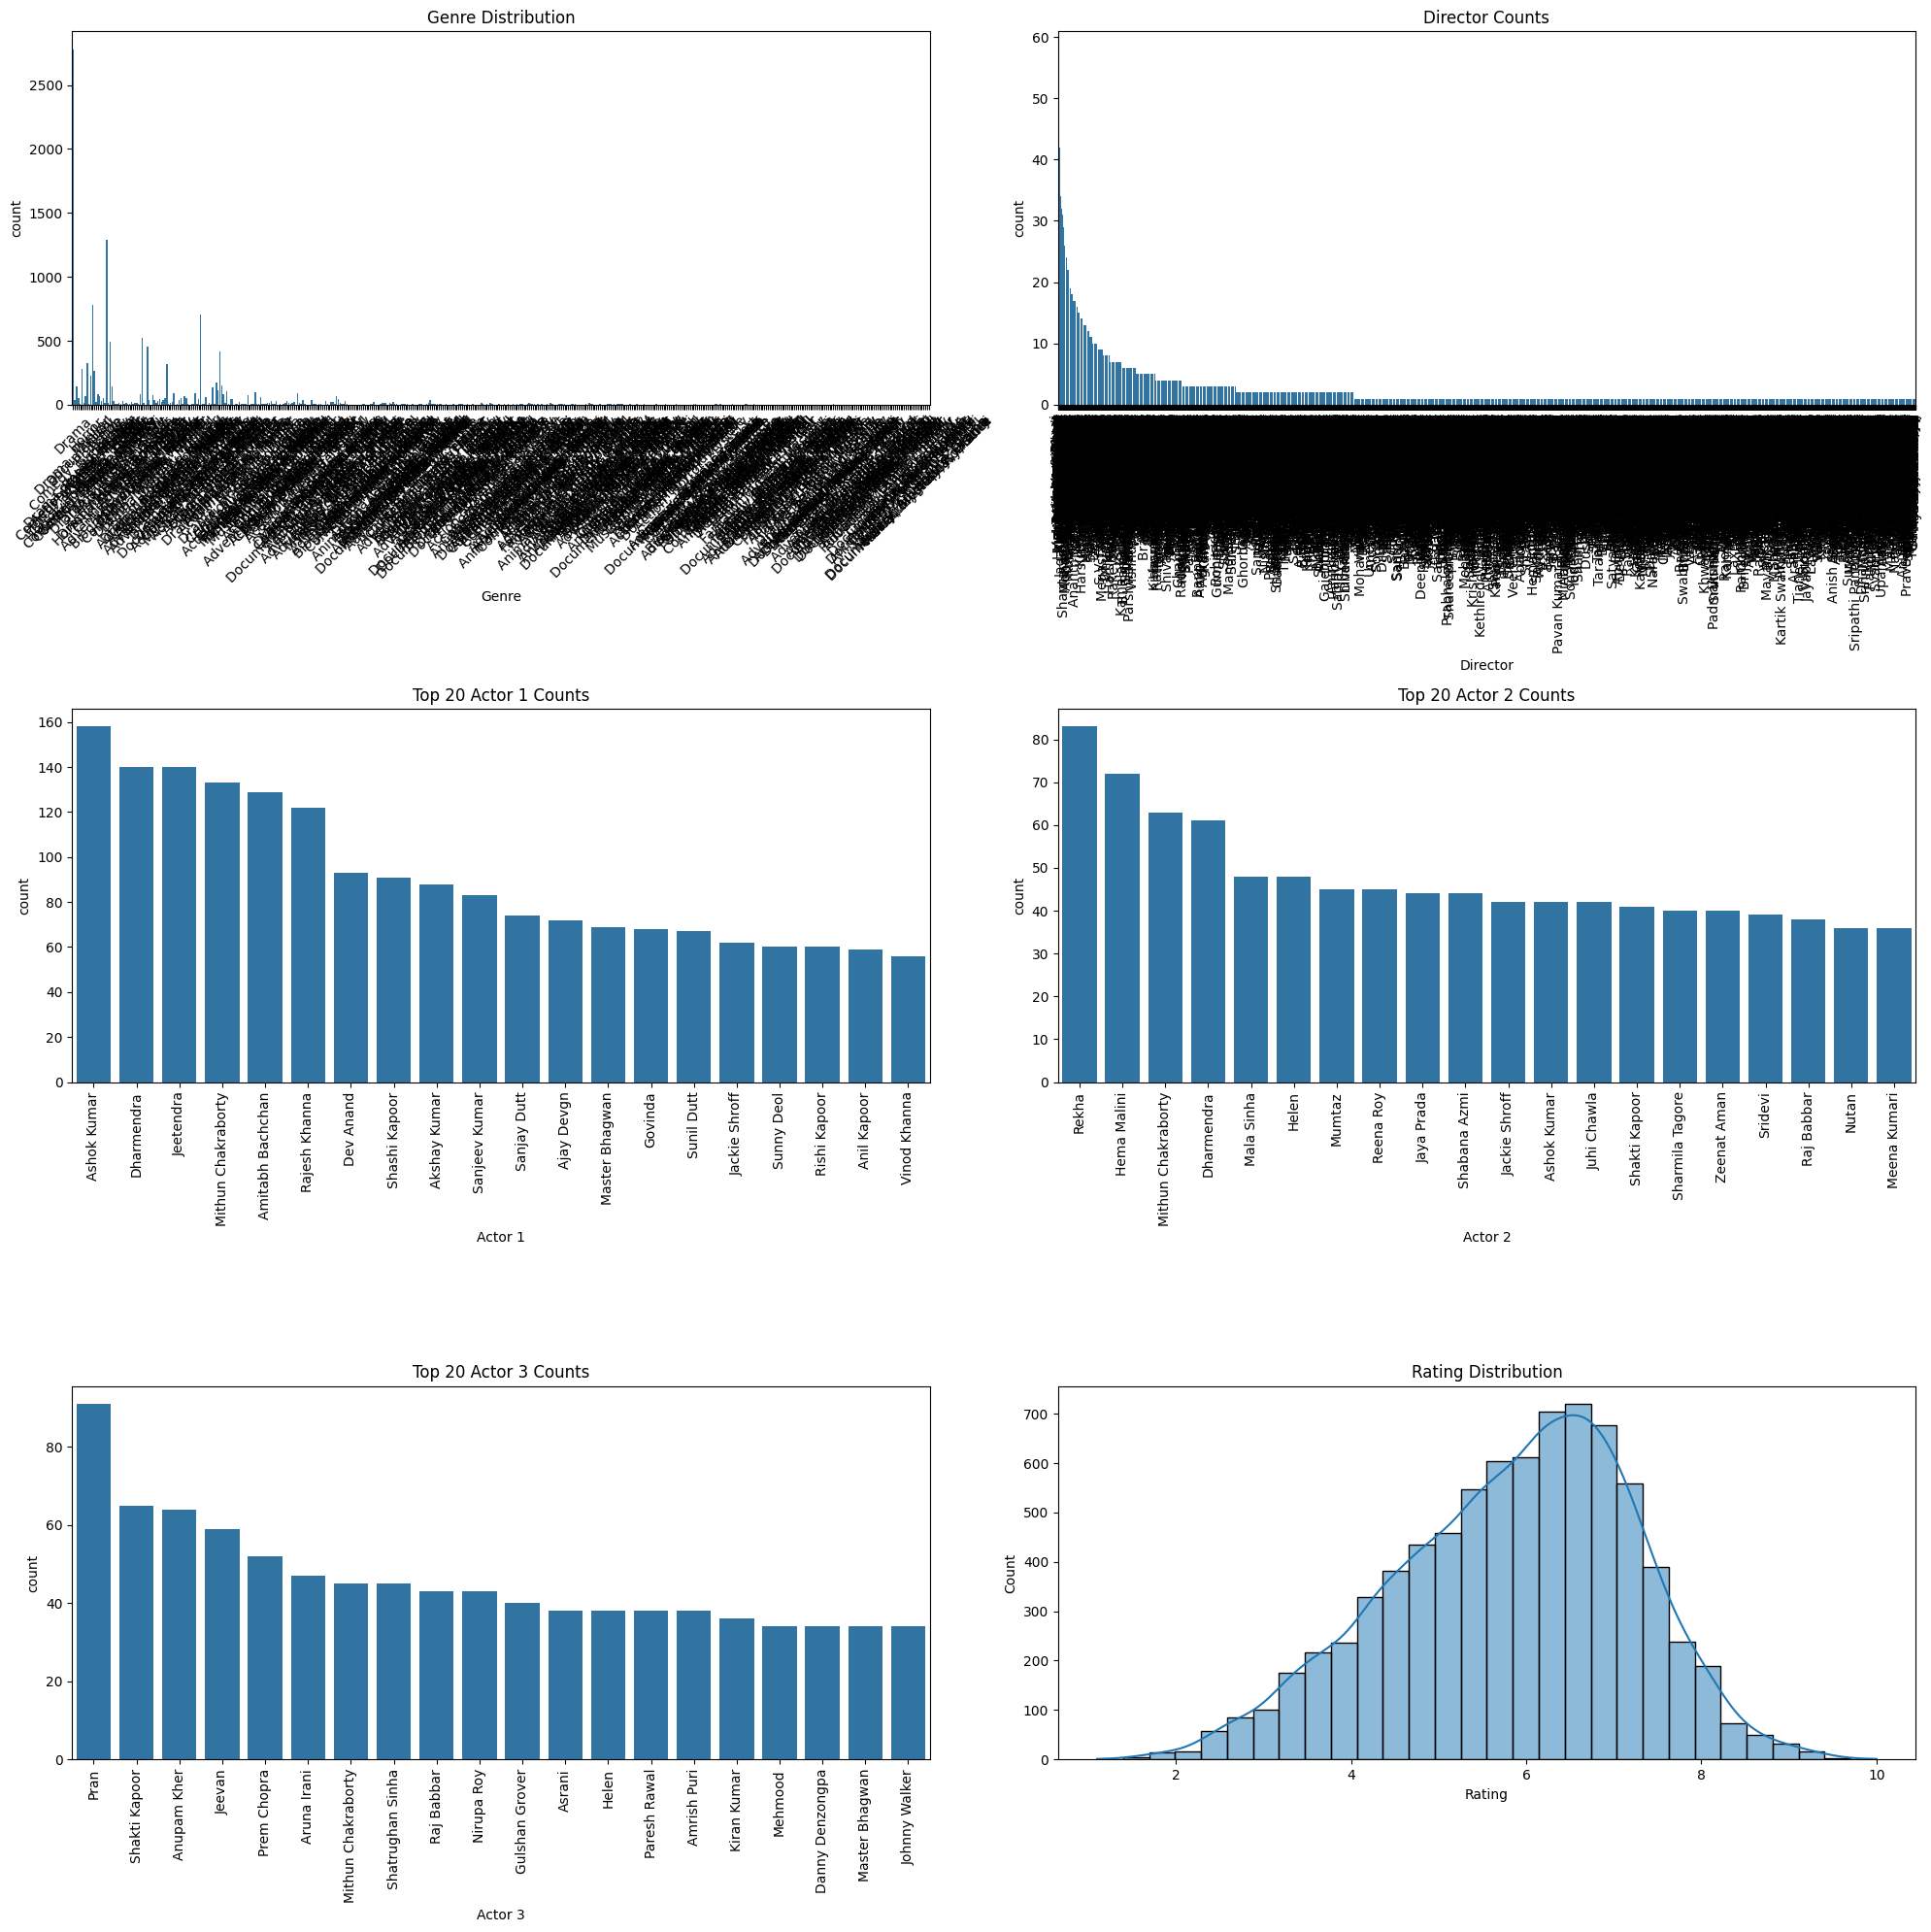

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
data = pd.read_csv(r"/content/IMDb Movies India.csv", encoding='latin1')

# Define plot size parameters
plt.figure(figsize=(20, 20))

# Plot 1: Genre Distribution
plt.subplot(3, 2, 1)
sns.countplot(x='Genre', data=data)
plt.xticks(rotation=45)
plt.title('Genre Distribution')

# Plot 2: Director Counts
plt.subplot(3, 2, 2)
sns.countplot(x='Director', data=data, order=data['Director'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Director Counts')

# Plot 3: Actor 1 Counts (Top 20)
plt.subplot(3, 2, 3)
sns.countplot(x='Actor 1', data=data, order=data['Actor 1'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Top 20 Actor 1 Counts')

# Plot 4: Actor 2 Counts (Top 20)
plt.subplot(3, 2, 4)
sns.countplot(x='Actor 2', data=data, order=data['Actor 2'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Top 20 Actor 2 Counts')

# Plot 5: Actor 3 Counts (Top 20)
plt.subplot(3, 2, 5)
sns.countplot(x='Actor 3', data=data, order=data['Actor 3'].value_counts().iloc[:20].index)
plt.xticks(rotation=90)
plt.title('Top 20 Actor 3 Counts')

# Plot 6: Rating Distribution
plt.subplot(3, 2, 6)
sns.histplot(data['Rating'].dropna(), bins=30, kde=True)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Count')

# Adjust layout and show plot
plt.tight_layout()
plt.show()

